In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.realpath('..'))

In [27]:
import numpy as np
import plotly.express as ex
import plotly.graph_objects as go
import pandas as pd
import cache_magic

from math import sqrt
from numpy import exp

from tracking.motion import constant_velocity_models, constant_acceleration_models
from tracking.target import ConstantAccelerationTarget, ConstantVelocityTarget, SinusTarget, SingerTarget
from tracking.kalman import kalman_pv
from tracking.simulation import monte_carlo, rmse, execute, state_residuals
from tracking.evaluation import create_track, create_truth_track, compare_tracks, Track, compare_tracks_mahalanobis, mahalanobis_distance

from tracking.util import to_df, as_png

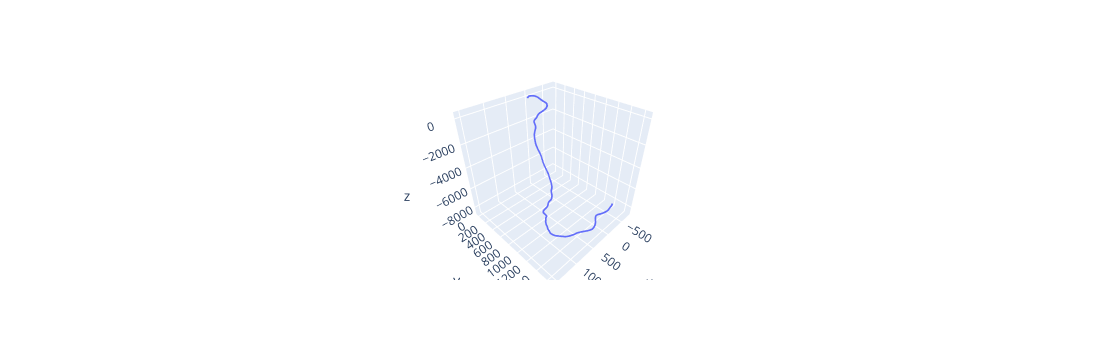

In [4]:
target = SingerTarget(1, 1, seed=0)

fig = ex.scatter_3d(target.true_states_df(), x='x', y='y', z='z')
fig.update_traces(marker_size = 1)
fig

In [5]:
motion  = constant_velocity_models(.1)
z_sigma = .87
r1      = monte_carlo([target], motion, z_sigma, n=600, seeds=[0])[0]

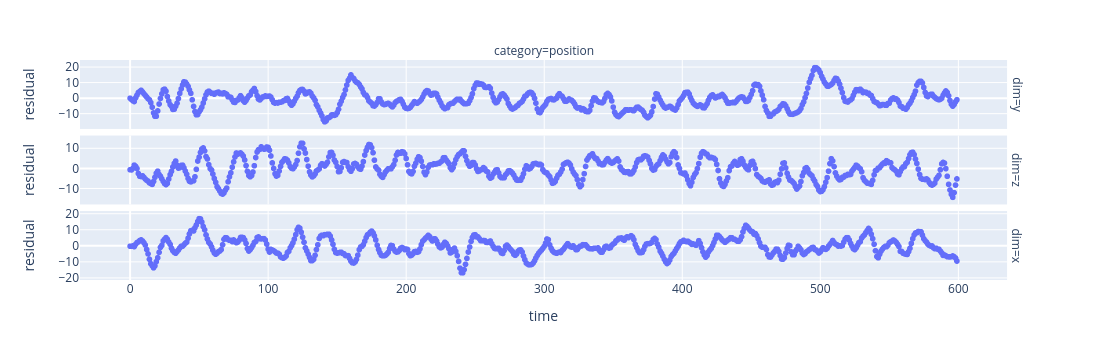

In [6]:
err = state_residuals(r1)
fig = ex.scatter(err, x='time', y='residual', facet_col='category', facet_row='dim')
fig.update_yaxes(matches=None, showticklabels=True)
fig

In [7]:
motion  = constant_acceleration_models(.1)
z_sigma = .87
r2      = monte_carlo([target], motion, z_sigma, n=600, seeds=[0])[0]

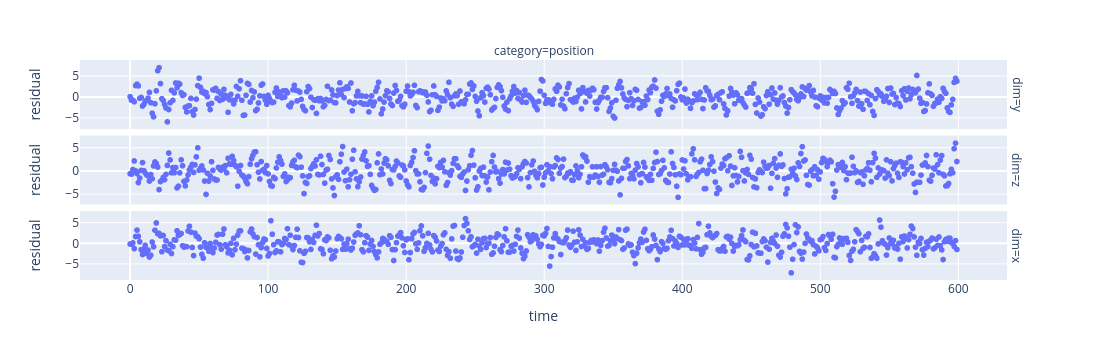

In [8]:
err = state_residuals(r2)
fig = ex.scatter(err, x='time', y='residual', facet_col='category', facet_row='dim')
fig.update_yaxes(matches=None, showticklabels=True)
fig

In [9]:
motion  = constant_acceleration_models(.1)
z_sigma = .87
r3      = monte_carlo([target], motion, z_sigma, n=600, seeds=[1])[0]

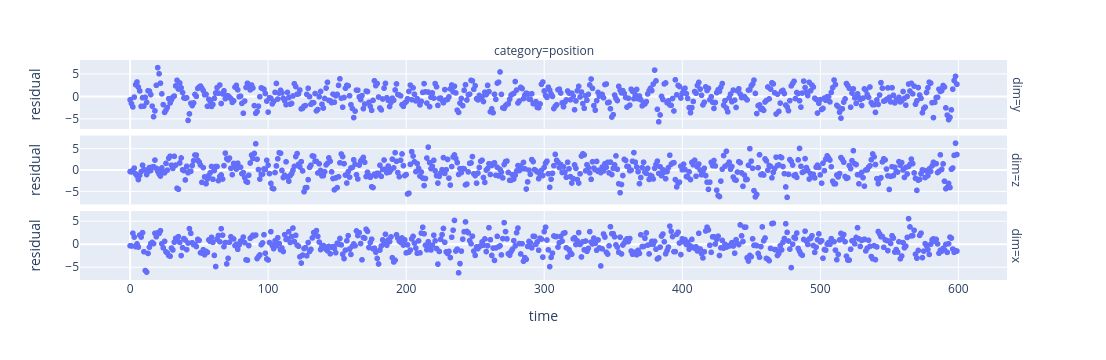

In [10]:
err = state_residuals(r3)
fig = ex.scatter(err, x='time', y='residual', facet_col='category', facet_row='dim')
fig.update_yaxes(matches=None, showticklabels=True)
fig

In [11]:
a = create_track(r1)
b = create_track(r2)
c = create_track(r3)

t = create_truth_track(r1)

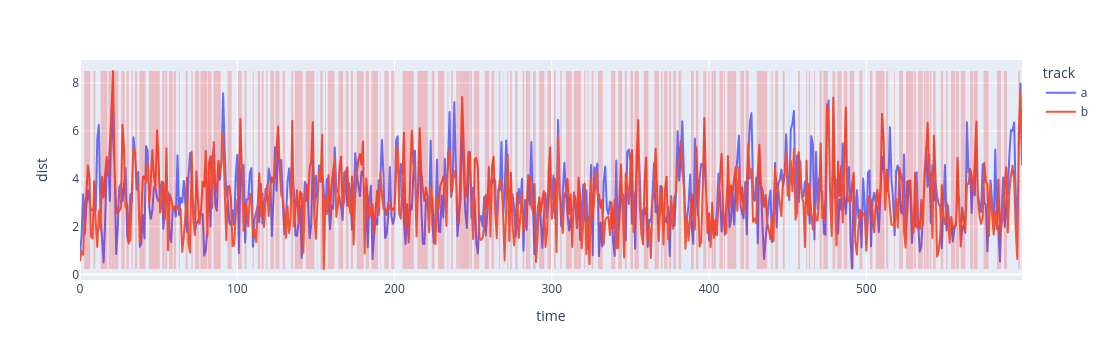

In [13]:
compare_tracks(c, b, t)

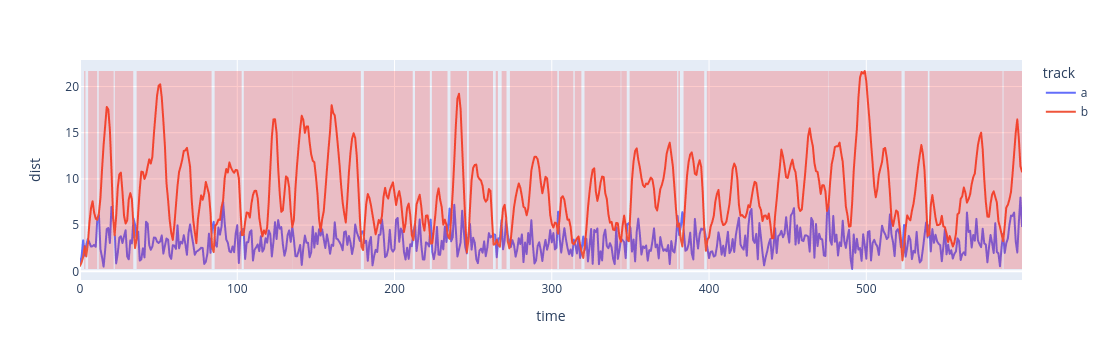

In [14]:
compare_tracks(c, a, t)

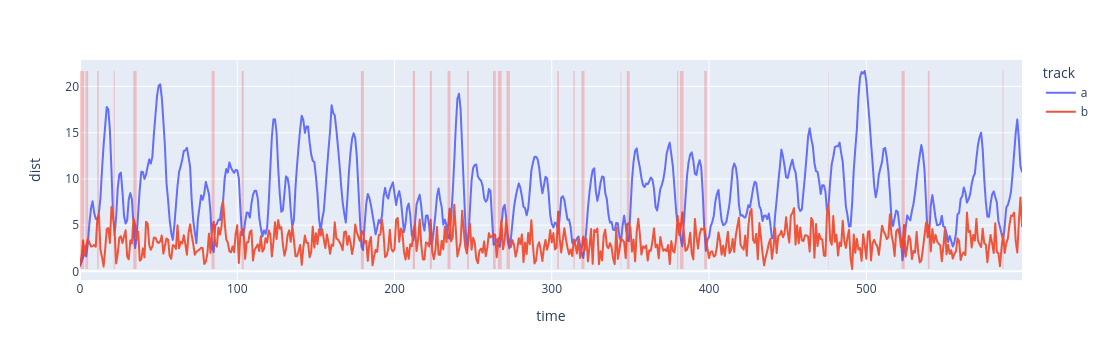

In [15]:
compare_tracks(a, c, t)

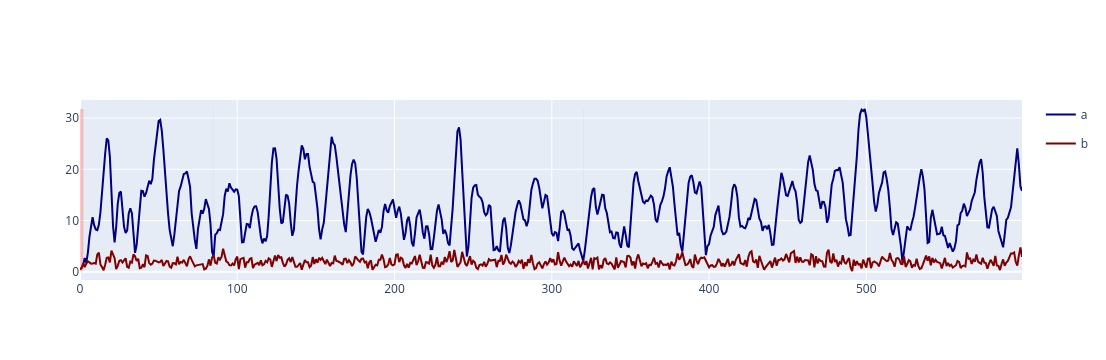

In [26]:
compare_tracks_mahalanobis(a, c, t)

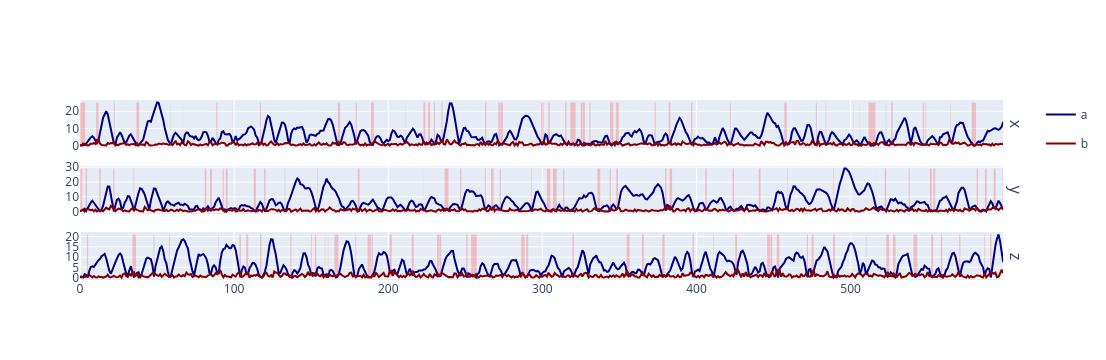

In [24]:
compare_tracks_mahalanobis(a, c, t, "split")

In [31]:
mahalanobis_distance(a, t).mean(), np.median(mahalanobis_distance(a, t))

(12.464962165510935, 11.767569987096973)

In [32]:
mahalanobis_distance(b, t).mean(), np.median(mahalanobis_distance(b, t))

(1.9076808730289896, 1.8501443884595465)